# Summary statistics of clinically relevant benchmarks (19.05.2021)

In [652]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle")
plt.rcParams.update({'font.size': 13})
%matplotlib inline

In [653]:
DATASETS = 'annotated-datasets.tsv'

In [654]:
datasets_df = pd.read_csv(DATASETS,  lineterminator='\n', na_values='', sep='\t')
datasets_df = datasets_df.fillna('')
datasets_df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
0,Dataset based on Chinese Coronary Artery Disea...,Clinical registry data verification,Data verification,,Disease registry data,Yes,"Accuracy, Recall, Time consumption",Described,Unknown,,...,Directly,,https://pubmed.ncbi.nlm.nih.gov/30777618,,,,Chinese,,,\r
1,Dataset of 1569 patients with PAD and controls...,Automatic ascertainment of PAD cases from clin...,Disease Prediction,https://identifiers.org/ito:ITO_00379,Clinical notes / EHR data,Yes,"Sensitivity, Specificity, PPV, NPV, Accuracy",Described,Unknown,,...,Directly,Clinicians,https://pubmed.ncbi.nlm.nih.gov/28189359,,,,English,,,\r
2,Dataset based on Cerner Health Facts®,Disease prediction,Disease prediction,,Clinical notes / EHR data,Yes,AUC-ROC,Described,Unknown,,...,Directly,,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,,,English,,,\r
3,Dataset based on Truven Health MarketScan®,Disease prediction,Disease prediction,,Claims data,Yes,AUC,Described,Unknown,,...,Directly,,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,https://arxiv.org/ftp/arxiv/papers/2005/2005.1...,,,English,,,\r
4,Dataset based on OncoSHARE database,Prediction of the timing of distant metastatic...,Event prediction,,Clinical notes / EHR data,Yes,"Classwise Sensitivity, Specificity, F1 Score, ...",Described,Unknown,,...,Directly,,https://pubmed.ncbi.nlm.nih.gov/31584836,,,,English,,,\r


### Total number of datasets

In [655]:
print('Total number of datasets: {0}'.format(datasets_df.shape[0]))

Total number of datasets: 475


In [656]:
# Filter out datasets not relevant to NLP
datasets_df = datasets_df[datasets_df['Relevant for NLP?'] == 'Yes'] 

In [657]:
print('Total number of datasets relevant for NLP: {0}'.format(datasets_df.shape[0]))

Total number of datasets relevant for NLP: 450


### Only benchmarks (= publicly available and has evaluation criteria)

In [658]:
# Filter for evaluation criteria
benchmarks_df = datasets_df[datasets_df['Has evaluation criteria?']!='No']
# Filter for availabiluity
#benchmarks_df = benchmarks_df[benchmarks_df['Accessibility'] =='Public']
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Not available']
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Public (planned)']
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Unknown']

In [659]:
benchmarks_df

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
9,IU X-Ray,Generating Radiology Reports,Text Generation,,Radiology reports,Yes,"BL-1, BL-2, BL-3, BL-4, METEOR, ROUGE-L",Described,Public,Not stated,...,Directly,,http://arxiv.org/abs/2010.10563v1,https://openi.nlm.nih.gov/,https://openi.nlm.nih.gov/,,English,,,\r
16,Dutch clinical corpus containing four types of...,Identifying contextual properties of medical t...,Identification of contextual properties,,Clinical notes / EHR data,Yes,"F1 score, Precision, Recall",Described,Public,Not stated,...,Indirectly,,https://pubmed.ncbi.nlm.nih.gov/25432799,,,,Dutch,,,\r
19,Dataset based on AskaPatient database which co...,Adverse drug event detection,Information Extraction,https://identifiers.org/ito:ITO_00721,Online forum posts / consumer reviews,Yes,Accuracy,Described,On request,Not stated,...,Indirectly,,http://arxiv.org/abs/1706.05549v1,https://arxiv.org/pdf/1706.05549v1.pdf,,,English,,Named entity recognition,\r
20,"Dataset based on 1,609 concepts derived from 5...",Automated phenotype extraction from clinical t...,Information Extraction,https://identifiers.org/ito:ITO_00705,Clinical notes / EHR data,Yes,"Exact-match, Generalized-match, Weighted gener...",Described,On request,Not stated,...,Indirectly,,https://pubmed.ncbi.nlm.nih.gov/31655273,,,,English,,,\r
21,dataset of 608 concepts derived from 50 case r...,Automated phenotype extraction from clinical t...,Information Extraction,https://identifiers.org/ito:ITO_00705,Clinical case reports,Yes,"Exact-match, Generalized-match, Weighted gener...",Described,On request,Not stated,...,Indirectly,,https://pubmed.ncbi.nlm.nih.gov/31655273,,,2019,English,,,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Social Media Mining for Health (SMM4H) 2020 ta...,Classification of Tweets Reporting a Birth Def...,Text Classification,https://identifiers.org/ito:ITO_01150,Social media data,Yes,Micro-averaged F1-score,Official,Public,Not stated,...,Not relevant,,https://healthlanguageprocessing.org/smm4h-sha...,https://healthlanguageprocessing.org/smm4h-sha...,,,English,,,\r
464,Social Media Mining for Health (SMM4H) 2020 ta...,Classification of Tweets that Mention Medications,Text Classification,https://identifiers.org/ito:ITO_01150,Social media data,Yes,F1 Score,Official,Public,Not stated,...,Not relevant,,https://healthlanguageprocessing.org/smm4h-sha...,https://data.mendeley.com/datasets/rxwfb3tysd/...,,,English,,,\r
465,Psychiatric notes from 2016 CEGS N-GRID shared...,De-identification of psychiatric notes,De-identification,,Clinical notes / EHR data,Yes,Not described,Official,On request,n2c2 NLP Data Use Agreement,...,Indirectly,,https://pubmed.ncbi.nlm.nih.gov/29854175,https://portal.dbmi.hms.harvard.edu/projects/n...,,2016,English,,,\r
473,The Indian Diabetic Retinopathy Image Dataset ...,Diabetic retinopathy segmentation and grading,Image segmentation; Image classification,,Ophthalmological images,Yes,"Accuracy, Euclidean Distance, Jaccard index",Official,Public,CC BY 4.0,...,Indirectly,,http://dx.doi.org/10.1109/TMI.2020.2978284,https://idrid.grand-challenge.org/,https://ieee-dataport.org/open-access/indian-d...,,English,,,\r


<AxesSubplot:title={'center':'Clinical relevance'}>

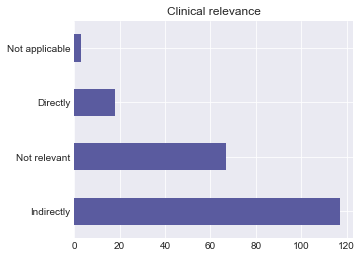

In [660]:
benchmarks_df['Clinical relevance'].value_counts().plot.barh(title='Clinical relevance', figsize=(5,4))

### Top 10 tasks of directly relevant benchmarks

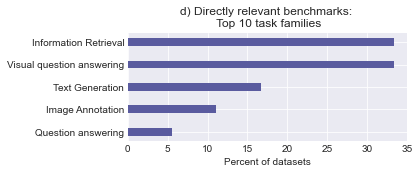

In [661]:
directly_relevant_df = benchmarks_df.loc[benchmarks_df['Clinical relevance'] == 'Directly']
tasks_directly_relevant = (directly_relevant_df['Mapped task'].value_counts()/directly_relevant_df.shape[0]*100).sort_values()[-10:].plot.barh(figsize=(5,2), width=0.35, title='d) Directly relevant benchmarks: \n Top 10 task families') 
tasks_directly_relevant.set_xlabel('Percent of datasets')
tasks_directly_relevant.figure.savefig('tasks_directly_relevant.png', bbox_inches='tight', dpi=300)


In [662]:
directly_relevant_df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
9,IU X-Ray,Generating Radiology Reports,Text Generation,,Radiology reports,Yes,"BL-1, BL-2, BL-3, BL-4, METEOR, ROUGE-L",Described,Public,Not stated,...,Directly,,http://arxiv.org/abs/2010.10563v1,https://openi.nlm.nih.gov/,https://openi.nlm.nih.gov/,,English,,,\r
78,Dataset based on 56 real life diagnostic cases,Search engine for rare diseases,Information Retrieval,https://identifiers.org/ito:ITO_01431,Biomedical scientfic literature,Yes,"Rank 1st rel, @10, @20",No,Public,Not stated,...,Directly,Clinicians,http://dx.doi.org/10.1016/j.ijmedinf.2013.01.005,https://arxiv.org/pdf/1303.3229.pdf,,,English,,,\r
82,VQA-RAD,Visual question answering,Visual question answering,https://identifiers.org/ito:ITO_00499,Radiology images,Yes,BLEU,No,Public,CC0 1.0 Universal,...,Directly,Radiologists,https://www.nature.com/articles/sdata2018251,https://www.nature.com/articles/sdata2018251,https://osf.io/89kps/,2018,English,,,\r
231,PEIR Gross dataset,Automatic Generation of Medical Imaging Reports,Text Generation,,Histology images,Yes,Not described,No,Public,Not stated,...,Directly,,https://www.aclweb.org/anthology/P18-1240.pdf,https://www.aclweb.org/anthology/P18-1240.pdf,https://peir.path.uab.edu/library/,,English,,,\r
232,PadChest,Image-based Medical Report Generation,Text Generation,,Radiology images; Radiology reports,Yes,Not described,No,On request,PADCHEST Dataset Research Use Agreement,...,Directly,,http://arxiv.org/abs/2010.10563v1,http://bimcv.cipf.es/bimcv-projects/padchest/,,2020,English,,,\r


### Top 10 tasks of indirectly relevant benchmarks

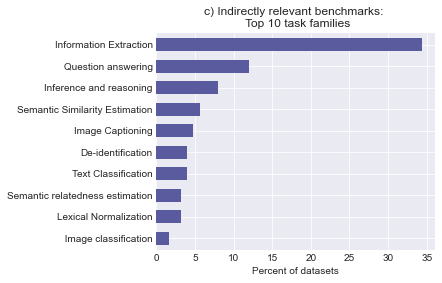

In [663]:
indirectly_relevant_df = benchmarks_df.loc[benchmarks_df['Clinical relevance'] == 'Indirectly']
indirectly_relevant_df = indirectly_relevant_df.assign(mapped_tasks=indirectly_relevant_df['Mapped task'].str.split(';')).explode('mapped_tasks')

tasks_indirectly_relevant = (indirectly_relevant_df['mapped_tasks'].value_counts()/indirectly_relevant_df.shape[0]*100).sort_values()[-10:].plot.barh(figsize=(5,4), width=0.6, title='c) Indirectly relevant benchmarks: \n Top 10 task families')
tasks_indirectly_relevant.set_xlabel('Percent of datasets')
tasks_indirectly_relevant.figure.savefig('tasks_indirectly_relevant.png', bbox_inches='tight', dpi=300)

### Source data type

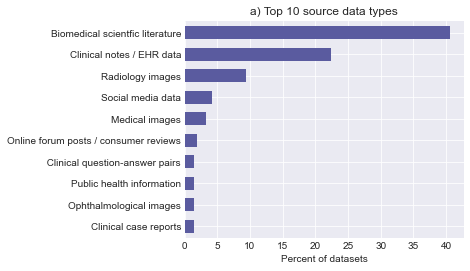

In [664]:
data_source_df = benchmarks_df.assign(data_basis=benchmarks_df['Data basis'].str.split(';')).explode('data_basis')

df = pd.get_dummies(data_source_df['data_basis']).sum()

df = df.sort_values()[-10:]/data_source_df.shape[0]*100
source_data_types_plot = df.plot.barh(width=0.6, figsize=(5,4), title='a) Top 10 source data types')
source_data_types_plot.set_xlabel('Percent of datasets')
source_data_types_plot.figure.savefig('source_data_types_plot.jpg', bbox_inches='tight', dpi=300)

In [665]:
datasets_df['Clinical relevance'].value_counts()
benchmarks_df = benchmarks_df.loc[benchmarks_df['Clinical relevance'] != 'Not applicable']
benchmarks_df['Clinical relevance'].value_counts()

Indirectly      117
Not relevant     67
Directly         18
Name: Clinical relevance, dtype: int64

In [666]:
# Non-benchmarks
non_benchmarks_df = datasets_df.loc[(datasets_df['Has evaluation criteria?']=='No') | 
                       (datasets_df['Accessibility']=='Unknown') |      
                        (datasets_df['Accessibility']=='Not available')]
non_benchmarks_df = non_benchmarks_df.loc[non_benchmarks_df['Clinical relevance'] != 'Not applicable']
non_benchmarks_df['Clinical relevance'].value_counts()


Indirectly      141
Not relevant     33
Directly         26
Name: Clinical relevance, dtype: int64

In [667]:
tot = benchmarks_df['Clinical relevance'].value_counts().sum() + non_benchmarks_df['Clinical relevance'].value_counts().sum()
tot

402

              Non-benchmark datasets  Benchmark datasets
Indirectly                       141                 117
Not relevant                      33                  67
Directly                          26                  18
              Non-benchmark datasets  Benchmark datasets
Indirectly                 35.074627           29.104478
Not relevant                8.208955           16.666667
Directly                    6.467662            4.477612


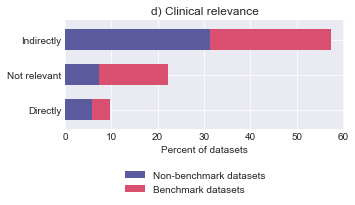

In [668]:
overview_df = pd.concat([non_benchmarks_df['Clinical relevance'].value_counts(), benchmarks_df['Clinical relevance'].value_counts()],  axis=1, keys=['Non-benchmark datasets', 'Benchmark datasets'])
#overview_df.index = ['Indirectly clinically relevant', 'Not clinically relevant', 'Directly clinically relevant']
print(overview_df)
print(overview_df/tot*100)
overview_fig = (overview_df.sort_values(by='Benchmark datasets')/datasets_df.shape[0]*100).plot.barh(stacked=True, figsize=(5,2), width=0.6, title='d) Clinical relevance')
overview_fig .legend(bbox_to_anchor=(0.75, -0.3))
overview_fig.set_xlabel('Percent of datasets')
overview_fig.figure.savefig('overview_df.png', bbox_inches='tight', dpi=300)

In [669]:
data_splits = pd.get_dummies(benchmarks_df['Data splits']).sum()
data_splits

Described         10
No                36
Not described     18
Official         138
dtype: int64

Text(0.5, 0, 'Percent of datasets')

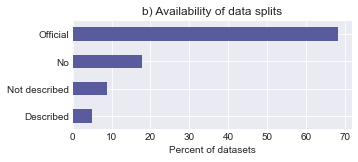

In [670]:
data_splits = pd.get_dummies(benchmarks_df['Data splits']).sum()/benchmarks_df.shape[0]*100
data_splits = data_splits.sort_values().plot.barh(width=0.5, figsize=(5,2), title='b) Availability of data splits')
data_splits.set_xlabel('Percent of datasets')